In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

FLATTEN_DIM = 28 * 28
TRAIN_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAIN_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(trainImages[0])

# transfer to float
trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 200
print(trainImages[0])

NUM_DIGITS = 10

trainLabels = utils.to_categorical(train_labels, NUM_DIGITS)
testLabels = utils.to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[0])

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(FLATTEN_DIM,)))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

tbCallback = TensorBoard(log_dir="logs/demo70", histogram_freq=0, write_graph=True,
                         write_images=True)
model.fit(trainImages, trainLabels, epochs=10, callbacks=[tbCallback])

predictLabels = model.predict_classes(testImages)
print("result=", predictLabels[:10])


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2586 - accuracy: 0.9257
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1139 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0769 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.0586 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 2s 1000us/step - loss: 0.0452 - accuracy: 0.98

c:\users\admin\envs\tf25\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


result= [7 2 1 0 4 1 4 9 5 9]


In [4]:
predicts = model.predict(testImages)
np.argmax(predicts[:10], axis=-1)


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [5]:
loss, accuracy = model.evaluate(testImages, testLabels)
print("accuracy={}, loss={}".format(accuracy, loss))


313/313 [==============================] - 0s 706us/step - loss: 0.0938 - accuracy: 0.9797
accuracy=0.9797000288963318, loss=0.0938151627779007


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2360 - accuracy: 0.9319
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0987 - accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0688 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0531 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0410 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0335 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0286 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0246 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0215 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

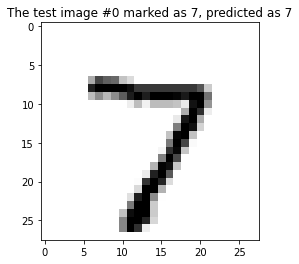

In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

FLATTEN_DIM = 28 * 28
TRAIN_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAIN_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(trainImages[0])

# transfer to float
trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 200
print(trainImages[0])

NUM_DIGITS = 10

trainLabels = utils.to_categorical(train_labels, NUM_DIGITS)
testLabels = utils.to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[0])

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(FLATTEN_DIM,)))
model.add(Dense(64, activation='relu',))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

tbCallback = TensorBoard(log_dir="logs/demo70", histogram_freq=0, write_graph=True,
                         write_images=True)
model.fit(trainImages, trainLabels, epochs=10, callbacks=[tbCallback])

predictLabels = model.predict_classes(testImages)
print("result=", predictLabels[:10])


import matplotlib.pyplot as plt
def plotTestImage(index):
    plt.title("The test image #%d marked as %d, predicted as %d" % (index, test_labels[index], predictLabels[index]))
    plt.imshow(test_images[index], cmap='binary')
    plt.show()
plotTestImage(0)


In [7]:
trainHistory = model.fit(trainImages, trainLabels, epochs=10, callbacks=[tbCallback], validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0199 - val_accuracy: 0.9928
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0172 - val_accuracy: 0.9938
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0231 - val_accuracy: 0.9920
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.0188 - val_accuracy: 0.9933
Epoch 5/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0249 - val_accuracy: 0.9935
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0281 - val_accuracy:

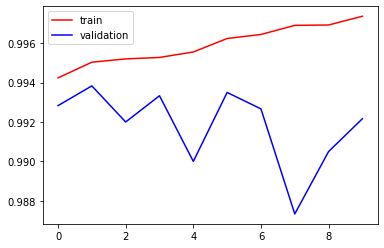

In [8]:
plt.plot(trainHistory.history['accuracy'],color='red')
plt.plot(trainHistory.history['val_accuracy'],color='blue')
plt.legend(['train','validation'])


In [9]:
import pandas as pd
pd.crosstab(test_labels, predictLabels, rownames=['label'], colnames=['predict'])


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,1,0,0,0,1,1,0,1,2
1,0,1128,1,0,0,0,2,0,4,0
2,16,3,996,3,1,0,4,5,4,0
3,0,0,0,988,0,13,0,4,3,2
4,3,0,2,1,965,0,3,0,0,8
5,3,0,0,3,1,876,2,1,5,1
6,19,2,0,1,2,5,927,0,2,0
7,1,3,8,3,0,0,0,1000,3,10
8,6,0,1,6,1,4,0,4,947,5


In [10]:
measure1 = pd.DataFrame({'label':test_labels,'predict':predictLabels})
measure1[:10]


,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [11]:
errors = measure1[(measure1.label==4)&(measure1.predict==9)]
errors


,label,predict
1242,4,9
2053,4,9
2130,4,9
2877,4,9
4017,4,9
4860,4,9
5936,4,9
8527,4,9


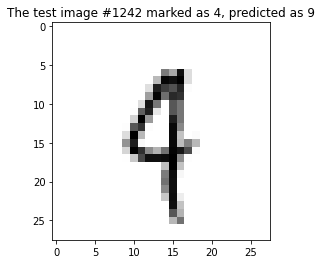

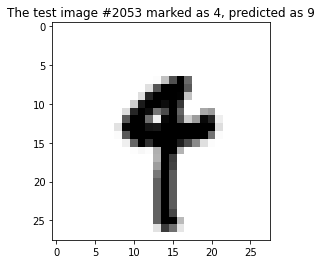

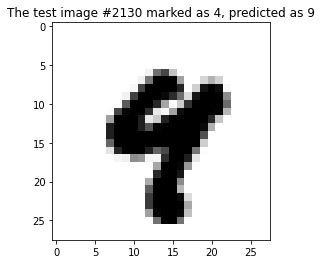

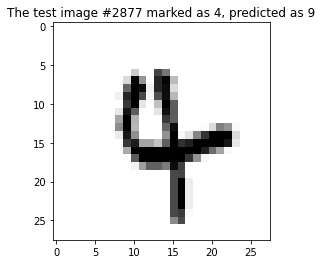

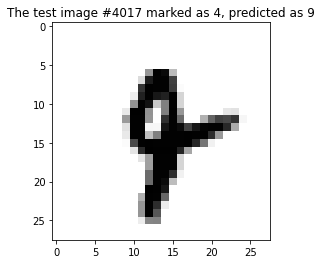

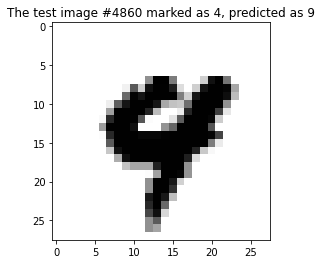

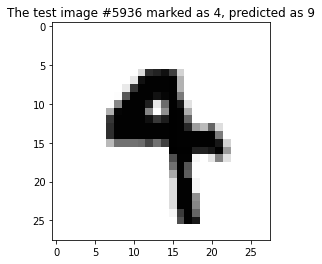

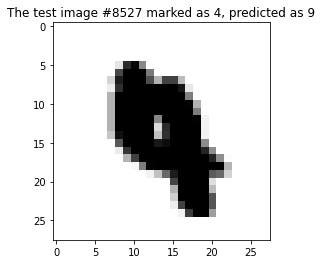

In [12]:
for i in errors.index:
    plotTestImage(i)


(60000, 28, 28)


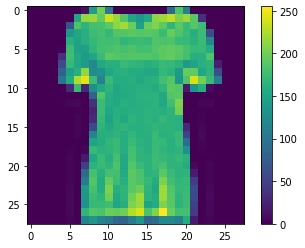

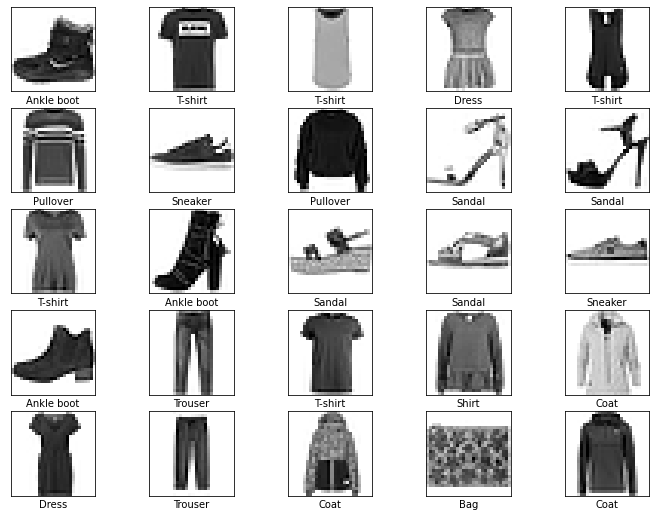

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5311 - accuracy: 0.8151 - val_loss: 0.4185 - val_accuracy: 0.8477
Epoch 2/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3957 - accuracy: 0.8596 - val_loss: 0.3921 - val_accuracy: 0.8592
Epoch 3/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3592 - accurac

In [13]:
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(12, 9))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = Sequential([Flatten(input_shape=(28, 28)),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

model.fit(train_images, train_labels, epochs=20, validation_split=0.1)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n\ntest accuracy:", test_acc)


In [17]:
predictions = model.predict(test_images)
predictions[0]

array([7.4015338e-10, 4.5168207e-13, 8.7201204e-07, 1.2053393e-10,
       1.6338614e-08, 6.8721883e-03, 4.1831456e-07, 7.1844542e-03,
       5.7097999e-08, 9.8594207e-01], dtype=float32)

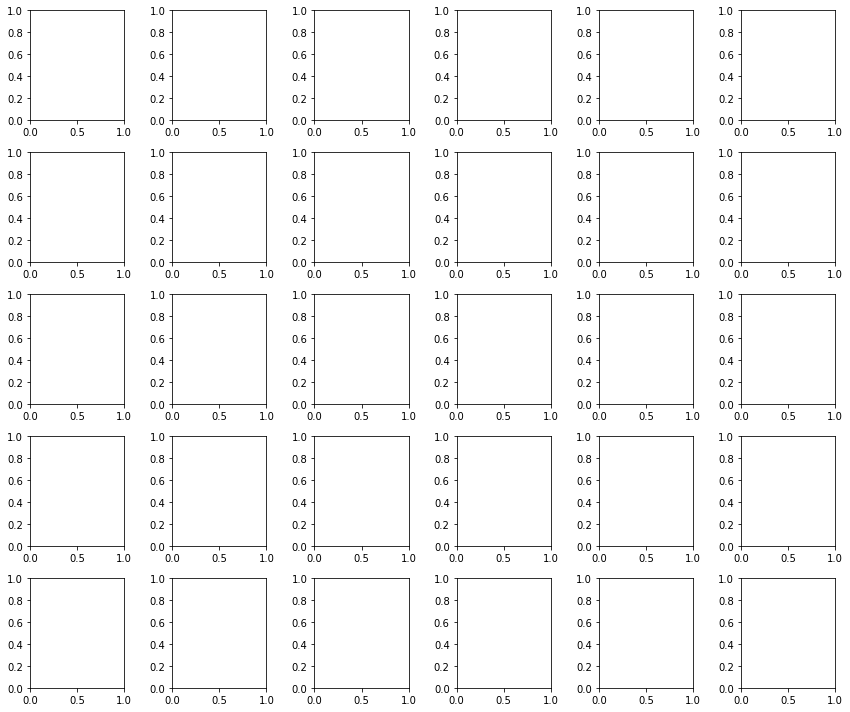

In [18]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
plt.tight_layout()
plt.show()

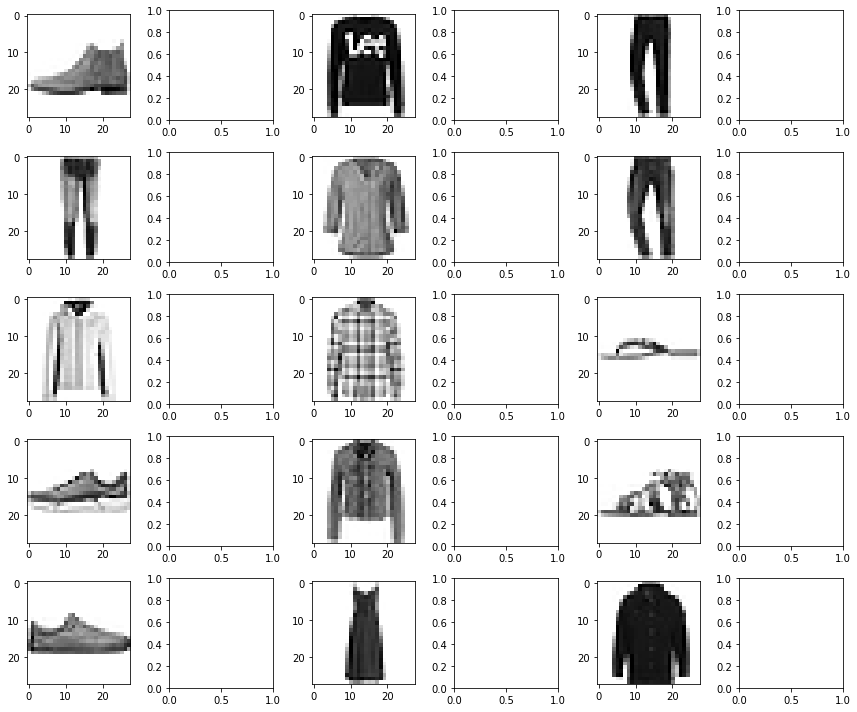

In [19]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
def plot_image(i,predictions_array, true_label, img):
    image = img[i]
    plt.imshow(image, cmap=plt.cm.binary)

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
plt.tight_layout()
plt.show()

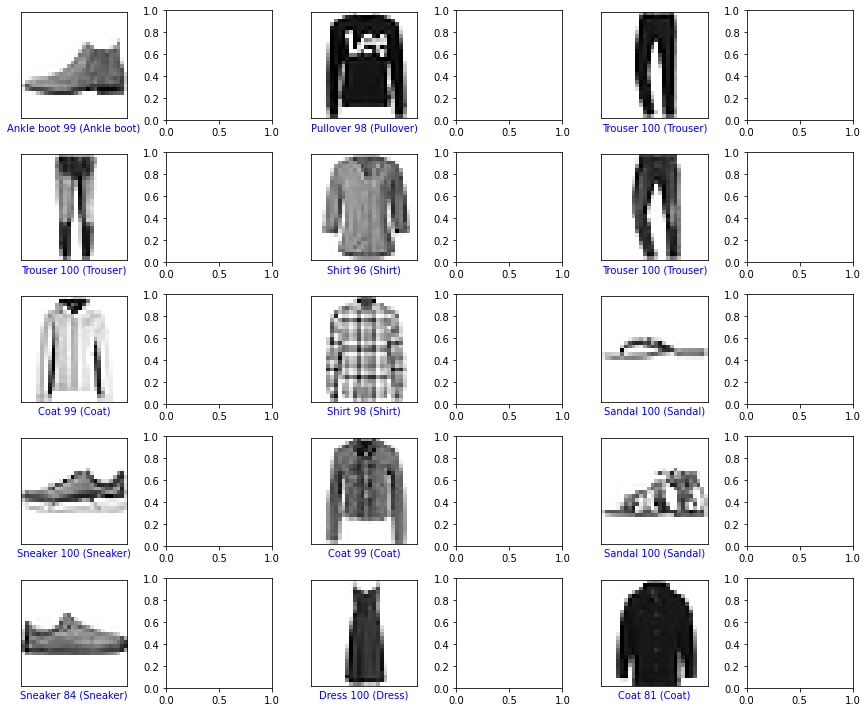

In [24]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
def plot_image(i,predictions_array, true_label, img):
    image = img[i]
    current_true_label = true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == current_true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[current_true_label]),
              color=color)

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
plt.tight_layout()
plt.show()

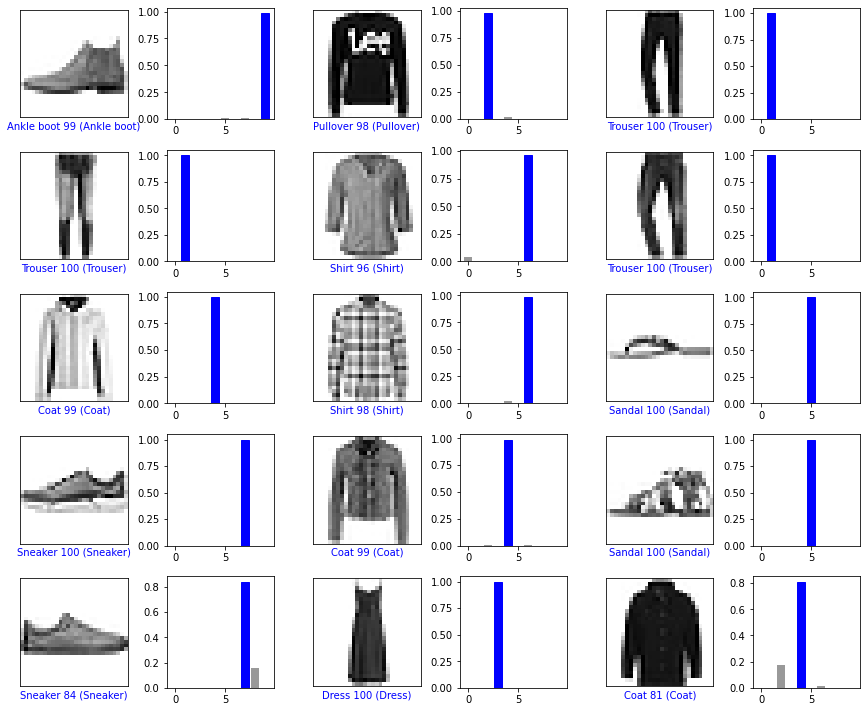

In [25]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
def plot_image(i,predictions_array, true_label, img):
    image = img[i]
    current_true_label = true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == current_true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[current_true_label]),
              color=color)
def plot_value_array(i, predictions_array, true_label):
    current_true_label = true_label[i]
    thisPlot = plt.bar(range(10), predictions_array, color='#999999')
    predicted_label = np.argmax(predictions_array)
    thisPlot[predicted_label].set_color('red')
    thisPlot[current_true_label].set_color('blue')
    

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()